In [16]:
import pandas as pd

pd.options.display.max_rows = 10
pd.options.display.max_columns = 1000

from sklearn import *
import numpy as np

from mlxtend.plotting import plot_confusion_matrix


In [5]:
df = pd.read_csv("/data/credit-default.csv")

In [6]:
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,repaid,furniture,1736,< 100 DM,4 - 7 yrs,3,female,none,4,real estate,31,none,own,1,1,1,none,yes,unskilled resident
996,< 0 DM,30,repaid,car (used),3857,< 100 DM,1 - 4 yrs,4,divorced male,none,4,building society savings,40,none,own,1,1,1,yes,yes,mangement self-employed
997,unknown,12,repaid,radio/tv,804,< 100 DM,> 7 yrs,4,single male,none,4,other,38,none,own,1,1,1,none,yes,skilled employee
998,< 0 DM,45,repaid,radio/tv,1845,< 100 DM,1 - 4 yrs,4,single male,none,4,unknown/none,23,none,for free,1,2,1,yes,yes,skilled employee


In [7]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [12]:
target = "default"
X = df.copy()
del X[target]

X = pd.get_dummies(X, drop_first=True)
columns = X.columns
y = np.where(df[target] == 2, 1, 0)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype(np.float64)
                            , y, test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [13]:
y_train

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,

In [14]:
y_train_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,

(<matplotlib.figure.Figure at 0x1a12918978>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1f417668>)

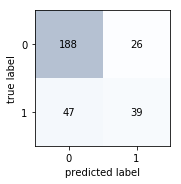

In [17]:
cf = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cf)

In [18]:
( 188 + 39 ) / 300

0.7566666666666667

In [19]:
metrics.accuracy_score(y_test, y_test_pred)

0.7566666666666667

In [27]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]

In [28]:
y_test_prob

array([0.39057174, 0.93703644, 0.20657021, 0.61518513, 0.84263414,
       0.64645627, 0.4494791 , 0.2594988 , 0.07077182, 0.213155  ,
       0.82216781, 0.47922995, 0.10628614, 0.04927787, 0.37051886,
       0.40154836, 0.02384756, 0.08634611, 0.03673578, 0.8716225 ,
       0.17347053, 0.68418377, 0.08289624, 0.08335264, 0.20201892,
       0.14277761, 0.11199784, 0.22723868, 0.08939474, 0.8914261 ,
       0.3687219 , 0.03176349, 0.45735348, 0.21773117, 0.30430631,
       0.92027889, 0.24340843, 0.4961519 , 0.1303132 , 0.0819819 ,
       0.09401154, 0.58658622, 0.009761  , 0.49218681, 0.04921602,
       0.03568655, 0.10812248, 0.27239898, 0.0533497 , 0.10149276,
       0.22215534, 0.45281983, 0.59676824, 0.51534091, 0.22166303,
       0.1454495 , 0.58814834, 0.65672602, 0.02847046, 0.59138439,
       0.43687783, 0.07374869, 0.52003891, 0.01800186, 0.56258666,
       0.25013105, 0.18103621, 0.05744698, 0.8604261 , 0.93227089,
       0.16641523, 0.22303058, 0.03080095, 0.59138775, 0.14556

accuracy: 0.7566666666666667 
precision: 0.6 
recall: 0.45348837209302323 
f1_score: 0.5165562913907285


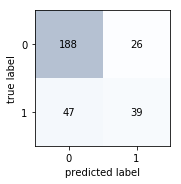

In [34]:
y_test_pred = np.where(y_test_prob > 0.5, 1, 0) #0.5 is the prob threshold
cf = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cf)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

accuracy: 0.7466666666666667 
precision: 0.75 
recall: 0.1744186046511628 
f1_score: 0.28301886792452835


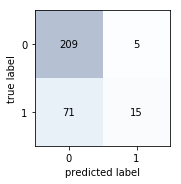

In [35]:
y_test_pred = np.where(y_test_prob > 0.8, 1, 0) #0.5 is the prob threshold
cf = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cf)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

accuracy: 0.6466666666666666 
precision: 0.43333333333333335 
recall: 0.7558139534883721 
f1_score: 0.5508474576271187


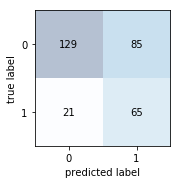

In [36]:
y_test_pred = np.where(y_test_prob > 0.2, 1, 0) #0.5 is the prob threshold
cf = metrics.confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cf)
print("accuracy:", metrics.accuracy_score(y_test, y_test_pred),
     "\nprecision:", metrics.precision_score(y_test, y_test_pred),
     "\nrecall:", metrics.recall_score(y_test, y_test_pred),
     "\nf1_score:", metrics.f1_score(y_test, y_test_pred))

In [31]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.694286
1    0.305714
dtype: float64

In [37]:
import matplotlib.pyplot as plt

Text(0,0.5,'TPR')

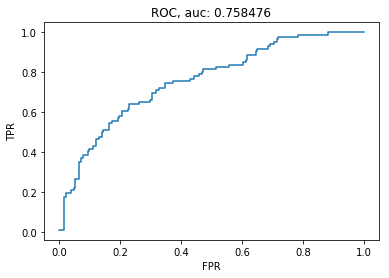

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr)
plt.title("ROC, auc: %f" % metrics.auc(fpr, tpr))
plt.xlabel("FPR")
plt.ylabel("TPR")

In [42]:
pd.read_csv("/data/creditcard-fraud.csv")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
